# Descriptive Statistics of Cleaned Data

In [1]:
#Import of needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.graph_objects as go
from scipy import stats
from numpy import median
import folium

### Read Data

In [2]:
#Read Data
kc_houses = pd.read_csv("/Users/juliaschafer/nf-sep-20/cgn-2020-ds-Project-EDA/cleansed_King_County_House_Prices.csv")

# to suppress scientifc notation of  numbers:
pd.options.display.float_format = '{:20,.2f}'.format

#enable horizontal scrolling in dataframes
pd.set_option("display.max_columns", None)

### Data EDA Overview

In [3]:
kc_houses.describe()

date                price             bedrooms  \
count            19,226.00            19,226.00            19,226.00   
mean                  6.58           484,353.72                 3.32   
std                   3.12           234,735.69                 0.85   
min                   1.00            82,000.00                 1.00   
25%                   4.00           313,225.00                 3.00   
50%                   6.00           435,000.00                 3.00   
75%                   9.00           600,000.00                 4.00   
max                  12.00         1,640,000.00                 6.00   

                 bathrooms            qm_living               qm_lot  \
count            19,226.00            19,226.00            19,226.00   
mean                  2.04               181.38               927.25   
std                   0.69                68.58             1,089.96   
min                   0.50                34.37                48.31   
25%                   1.50               129.13               464.51   
50%                   2.00               170.94               686.97   
75%                   2.50               224.34               926.50   
max                   4.25               441.29            12,747.59   

                    floors           waterfront                 view  \
count            19,226.00            19,226.00            19,226.00   
mean                  1.48                 0.00                 0.09   
std                   0.54                 0.02                 0.41   
min                   1.00                 0.00                 0.00   
25%                   1.00                 0.00                 0.00   
50%                   1.00                 0.00                 0.00   
75%                   2.00                 0.00                 0.00   
max                   3.00                 1.00                 2.00   

                 condition                grade      qm_above_ground  \
count            19,226.00            19,226.00            19,226.00   
mean                  3.41                 7.53               516.61   
std                   0.64                 1.02               214.88   
min                   2.00                 5.00               112.78   
25%                   3.00                 7.00               356.62   
50%                   3.00                 7.00               460.25   
75%                   4.00                 8.00               640.08   
max                   5.00                11.00             1,301.50   

               qm_basement             yr_built         yr_renovated  \
count            19,226.00            19,226.00            19,226.00   
mean                 78.47             1,970.71                59.80   
std                 118.45                29.34               340.30   
min                   0.00             1,900.00                 0.00   
25%                   0.00             1,951.00                 0.00   
50%                   0.00             1,974.00                 0.00   
75%                 152.40             1,996.00                 0.00   
max                 490.73             2,015.00             2,015.00   

                   zipcode  yrs_since_renovation            house_age  \
count            19,226.00             19,226.00            19,226.00   
mean             98,078.63                  0.57                44.29   
std                  53.29                  4.28                29.34   
min              98,001.00                  0.00                 0.00   
25%              98,033.00                  0.00                19.00   
50%              98,065.00                  0.00                41.00   
75%              98,118.00                  0.00                64.00   
max              98,199.00                 81.00               115.00   

             yrs_built_ren                  lat                 long  \
count            19,226.00            19,226.00

Although outliers have been removed, dispersions of house prices, footage measures, ... are still high.

In the following, descriptive data analysis is not exhaustively performed. I rather concentrated on the following four questions: 
1. How do prices differ between old and new buildings? One would expect old houses to be less expensive, at least when they haven't been renovated or the last renovation has been several years ago. 
2. What is the best time of the year to buy a house?
3. How do prices differ between King County regions? What is the place to be in King County? 

### Old but gold? Old vs. New Houses

In [4]:
#Definition of bins for house age
age_bins = pd.cut(kc_houses['house_age'], bins = np.arange(0, 135, 25), labels = ['0 - 24 yrs', '25 - 49 yrs', '50 - 74 yrs', '75 - 99 yrs', '>= 100 yrs'])
age_bins.name = 'age_bins'
kc_houses = pd.concat([kc_houses, age_bins], axis = 1)

#### Connection between house age and median prices 

The median is used for most price calculations since the dispersion of price is very high. Therefore, the median is more representative as a measure of central tendency than the mean.

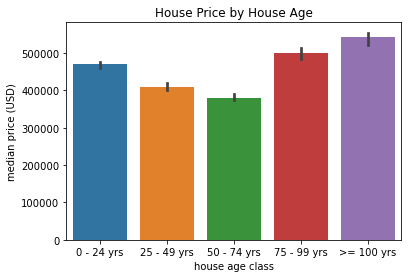

In [5]:
sns.barplot(data = kc_houses, y = 'price', x = 'age_bins', estimator = median).set(title = 'House Price by House Age', xlabel = 'house age class', ylabel = 'median price (USD)');
plt.savefig('price_age.jpeg')

In [6]:
kc_houses.age_bins.value_counts()

0 - 24 yrs     6070
25 - 49 yrs    5376
50 - 74 yrs    4939
75 - 99 yrs    1873
>= 100 yrs      936
Name: age_bins, dtype: int64

Old but gold, indeed! Although houses from WWII to mid-century are a bit (!) cheaper, even older houses have the same price level as newer ones. 
Let's see which impact the renovation of houses has on this correlation.

#### Connection between house age, renovation status and median prices

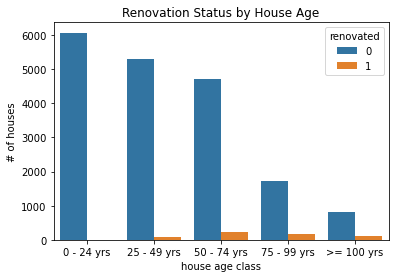

In [7]:
sns.countplot(x = 'age_bins', hue = 'renovated', data = kc_houses).set(title = 'Renovation Status by House Age', xlabel = 'house age class', ylabel = '# of houses');
plt.savefig('renovation_age.jpeg')

Regardless of how old the houses are, only a small proportion has ever been renovated. What does tha mean for the prices?

#### Connection between renovation status, house age and price

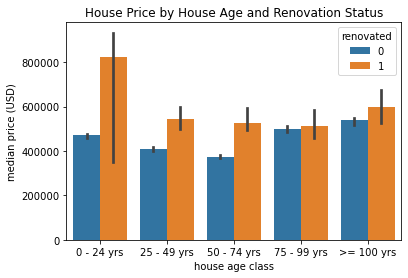

In [8]:

sns.barplot(data = kc_houses, y = 'price', x = 'age_bins', hue = 'renovated', 
            estimator = median).set(title = 'House Price by House Age and Renovation Status', xlabel = 'house age class', ylabel = 'median price (USD)');
plt.savefig('renovation_status_price.jpeg')

Not surprising, when houses have been renovated they are sold for higher prices, although the difference is smaller for very old houses. Hence, if you love the atmosphere of really old houses, make sure you don't need to renovate yourself - this will be more expensive. 
But careful: Only few houses have been renovated at all, so one cannot really infer anything. 

Let's take a look at the influence of overall house condition on old vs. new houses:

#### Connection between overall condition, house age and price

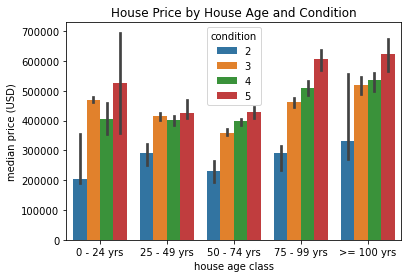

In [9]:

sns.barplot(data = kc_houses, y = 'price', x = 'age_bins', hue = 'condition', 
            estimator = median).set(title = 'House Price by House Age and Condition', 
                                    xlabel = 'house age class', ylabel = 'median price (USD)');
plt.savefig('condition_price_age.jpeg')

No surprise: The better the condition, the more you have to pay for the house, independent of whether how old the house is. 

In [10]:
kc_houses.groupby(['age_bins', 'condition']).price.count()

age_bins     condition
0 - 24 yrs   2               3
             3            5828
             4             220
             5              19
25 - 49 yrs  2              37
             3            2873
             4            2098
             5             368
50 - 74 yrs  2              63
             3            2493
             4            1788
             5             595
75 - 99 yrs  2              27
             3             835
             4             677
             5             334
>= 100 yrs   2              17
             3             435
             4             296
             5             188
Name: price, dtype: int64


Caveat: Group sizes are very small, so be careful to overinterpret!

### House-Buying Through the Year

#### Connection between month of sale and price

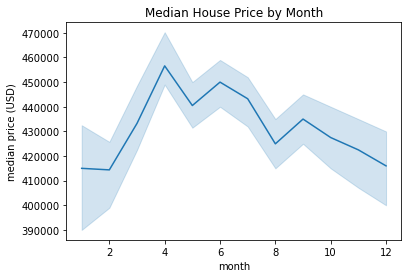

In [11]:
sns.lineplot(data = kc_houses, y = 'price', x = 'date', estimator = median).set(title = 'Median House Price by Month', xlabel = 'month',ylabel = 'median price (USD)')
plt.savefig('price_year.jpeg')

House prices fluctuate through the year with higher prices in the summer which is expectable. Though, the differences are marginal.
I expect this to also be valid for the number of sales. But let's see...

#### Connection between month of sale and number of sales

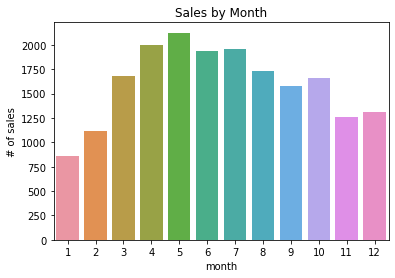

In [12]:
sns.countplot(data = kc_houses, x = 'date' ).set(title = 'Sales by Month', xlabel = 'month',ylabel = '# of sales')
plt.savefig('sales_year.jpeg')

#### Connection between house price, month of sale and house age

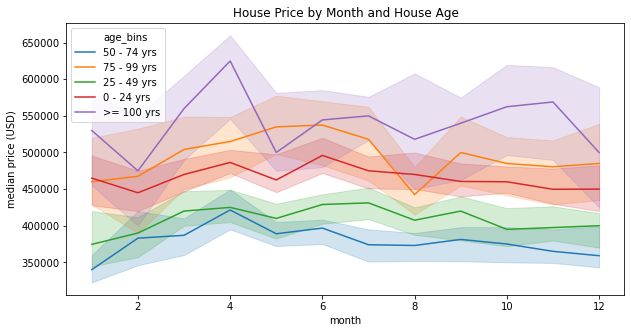

In [13]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = kc_houses, y = 'price', hue = 'age_bins', x = 'date', 
             estimator = median).set(title = 'House Price by Month and House Age', xlabel = 'month', ylabel = 'median price (USD)');
plt.savefig('price_age_month.jpeg')

Prices fluctuate most for very old houses and are relatively stable for new ones. 

#### Connection between house price, month of sale and waterfront location

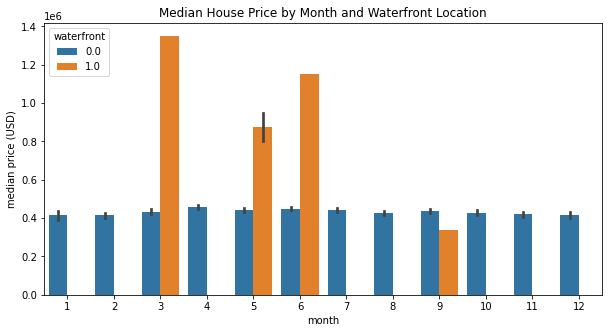

In [14]:
plt.figure(figsize = (10, 5))
sns.barplot(data = kc_houses, hue = 'waterfront', y = 'price', x = 'date', estimator = median).set(title = 'Median House Price by Month and Waterfront Location', xlabel = 'month',ylabel = 'median price (USD)')
plt.savefig('waterfront_price_year.jpeg')

In [15]:
kc_houses.groupby(['date', 'waterfront']).price.count()

date  waterfront
1     0.00           859
2     0.00          1116
3     0.00          1681
      1.00             1
4     0.00          1996
5     0.00          2123
      1.00             2
6     0.00          1936
      1.00             1
7     0.00          1960
8     0.00          1734
9     0.00          1578
      1.00             1
10    0.00          1663
11    0.00          1259
12    0.00          1316
Name: price, dtype: int64

This graphics can not be interpreted since there are only one or two cases with waterfront per group.

## It's all about the location

Everyone knows that where my property is located has a great influence on sale prices. But let's see what's the place to be in King County...

#### Connection between sales and zip code

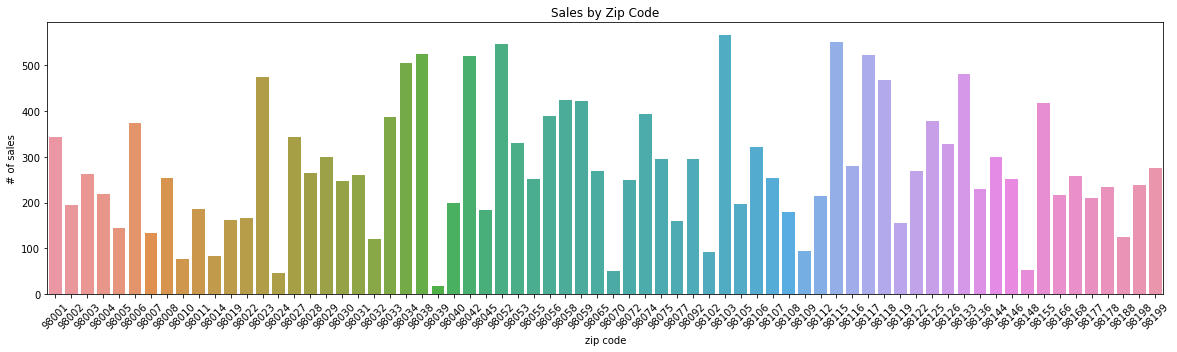

In [16]:
plt.figure(figsize=(20, 5))
sns.countplot(data = kc_houses, x = 'zipcode').set(title = 'Sales by Zip Code', xlabel = 'zip code',ylabel = '# of sales')
plt.xticks (rotation = 45)
plt.savefig('sales_zip.jpeg')

#### Connection between price and zip code

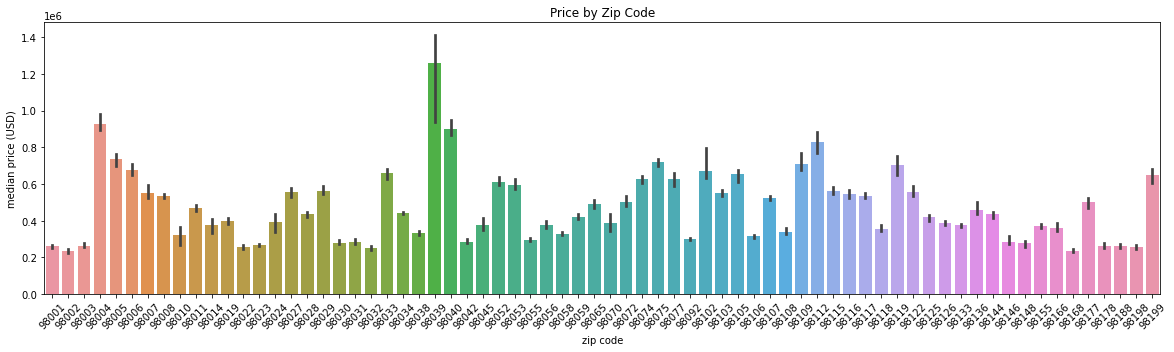

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(data = kc_houses, x = 'zipcode', y = 'price', estimator = median).set(title = 'Price by Zip Code', xlabel = 'zip code',ylabel = 'median price (USD)')
plt.xticks (rotation = 45)
plt.savefig('price_zip.jpeg')

There are indeed regions in King County where more houses are sold than in others. We cannot say whether this is because of a greater number of offers or because these regions are more desirable. 
What we can say is that the region where the fewest houses are sold is simultaneously the most expensive one (zipcode 98039, Medina). Taking a look at the map below we can guess that Medina is expesnive 
because it's by the water and close to Seattle with a connecting bridge. We can also guess that sales are low here because one simply doesn't move away from Medina...

#### Connection between condition and zip code

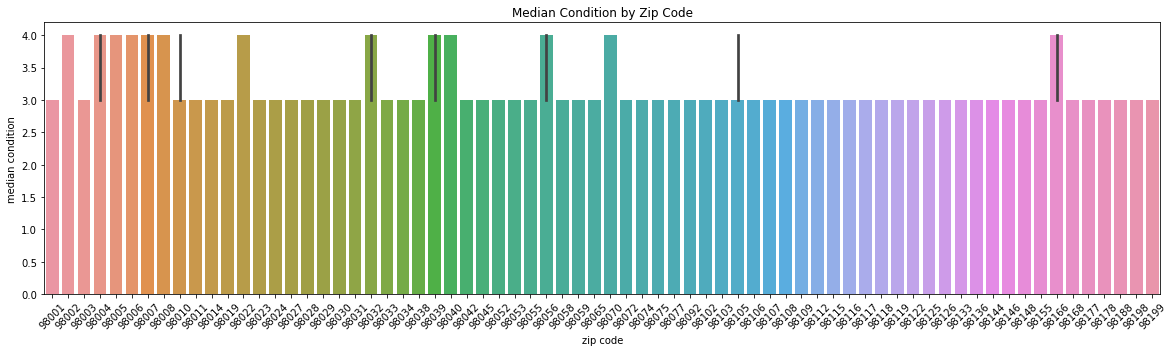

In [18]:
plt.figure(figsize=(20, 5))
sns.barplot(data = kc_houses, x = 'zipcode', y = 'condition', estimator = median).set(title = 'Median Condition by Zip Code', xlabel = 'zip code',ylabel = 'median condition')
plt.xticks (rotation = 45)
plt.savefig('condition_zip.jpeg')

In all regions, houses are in an at least average condition. If you want a little extra, there are some regions with houses in a good condition (Medina among them) 
AND there are huge differnces regarding the price. 

#### Connection between footage and zip code

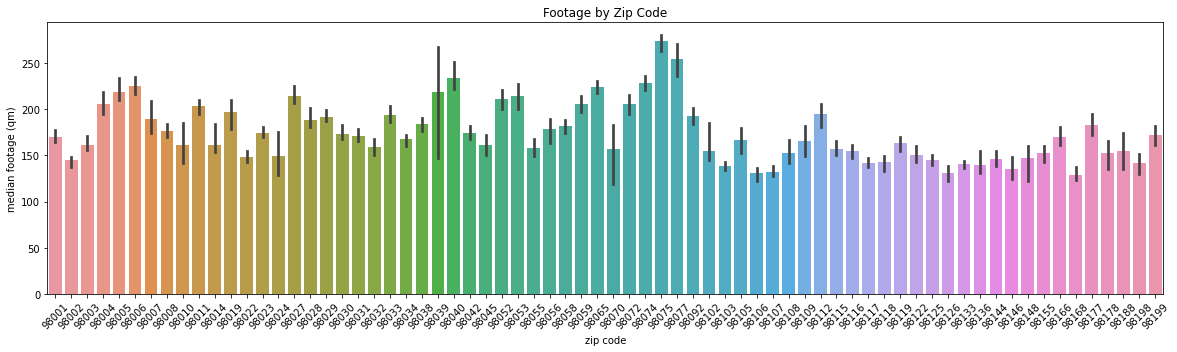

In [19]:
plt.figure(figsize=(20, 5))
sns.barplot(data = kc_houses, x = 'zipcode', y = 'qm_living', estimator = median).set(title = 'Footage by Zip Code', xlabel = 'zip code',ylabel = 'median footage (qm)')
plt.xticks (rotation = 45)
plt.savefig('footage_zip.jpeg')

#### Mapping Price by Zip Code

The following code enables us to color-code the King County regions (based on the zip code) in correlation with property prices.
I used the code from this [youtube video](https://www.youtube.com/watch?v=XuqU6FFQTu0&t=391s).

In [20]:
#convert the zipcode variable to string type
kc_houses.zipcode = kc_houses.zipcode.astype(str)

In [21]:
#new dataframe grouped by zipcode with the means of all columns
df_zipcode = kc_houses.groupby('zipcode').aggregate(np.mean)
df_zipcode.reset_index(inplace = True) 
df_zipcode.head()

zipcode                 date                price             bedrooms  \
0   98001                 6.53           278,379.79                 3.40   
1   98002                 6.67           232,828.32                 3.29   
2   98003                 6.57           284,646.23                 3.29   
3   98004                 6.50           999,257.36                 3.58   
4   98005                 6.81           750,718.41                 3.76   

             bathrooms            qm_living               qm_lot  \
0                 2.02               175.65             1,204.22   
1                 1.80               149.39               695.02   
2                 2.01               171.95               972.53   
3                 2.12               210.82             1,081.78   
4                 2.29               225.59             1,618.85   

                floors           waterfront                 view  \
0                 1.44                 0.00                 0.04   
1                 1.33                 0.00                 0.01   
2                 1.31                 0.00                 0.13   
3                 1.34                 0.00                 0.09   
4                 1.25                 0.00                 0.03   

             condition                grade      qm_above_ground  \
0                 3.33                 7.28               525.07   
1                 3.75                 6.69               457.41   
2                 3.38                 7.49               495.75   
3                 3.57                 8.04               579.09   
4                 3.73                 8.21               605.86   

           qm_basement             yr_built         yr_renovated  \
0                51.22             1,981.70                23.15   
1                32.72             1,967.64                50.95   
2                68.38             1,976.91                15.19   
3               112.57             1,965.00               128.42   
4               134.26             1,968.70                55.19   

   yrs_since_renovation            house_age        yrs_built_ren  \
0                  0.28                33.30             1,958.56   
1                  0.72                47.36             1,916.69   
2                  0.14                38.09             1,961.72   
3                  0.98                50.00             1,836.57   
4                  0.40                46.30             1,913.51   

                   lat                 long          qm_living15  \
0                47.31              -122.27               169.81   
1                47.31              -122.21               136.78   
2                47.32              -122.31               169.83   
3                47.61              -122.20               228.57   
4                47.61              -122.17               226.63   

              qm_lot15            renovated  
0             1,014.31                 0.01  
1               675.26                 0.03  
2               898.30                 0.01  
3             1,071.36                 0.06  
4             1,457.78                 0.03

In [22]:
#number of houses by zipcode 
kc_houses['count'] = 1
count_zip = kc_houses.groupby('zipcode').sum()
count_zip.reset_index(inplace = True)
count_zip = count_zip[['zipcode', 'count']] #we only want these two variables
df_zipcode = pd.merge(df_zipcode, count_zip, on = 'zipcode') #merge both dfs
kc_houses.drop(['count'], axis = 1, inplace = True) #we don't need this variable in the original df

In [23]:
#import json for geographical data and open the map the data is to be displayed on. I downloaded a KML-File and converted it online to geojson.
import json
f = open('/Users/juliaschafer/Documents/KC_area.geojson')
zip_geo = json.load(f)

In [24]:
#Explore the file for type and content

In [25]:
type(zip_geo)

dict

In [26]:
zip_geo.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [27]:
zip_geo['type']

'FeatureCollection'

In [28]:
zip_geo['features'][0]

{'type': 'Feature',
 'properties': {'Name': None,
  'description': None,
  'OBJECTID': 1,
  'ZIP': 98031,
  'ZIPCODE': '98031',
  'COUNTY': '033',
  'ZIP_TYPE': 'Standard',
  'Shape_Length': 117508.232812751,
  'Shape_Area': 228012907.118483},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-122.21842289814, 47.4375036472122],
    [-122.21896085951, 47.4375032342973],
    [-122.219575122557, 47.4375027471902],
    [-122.221597705574, 47.437501149099],
    [-122.221599480127, 47.4349568870741],
    [-122.221705161907, 47.4349571562322],
    [-122.223608929569, 47.4349619933269],
    [-122.223734570062, 47.434962098174],
    [-122.225877692641, 47.4349638801293],
    [-122.226123851499, 47.4350841347076],
    [-122.226188630175, 47.4351174488144],
    [-122.226288474562, 47.435165791227],
    [-122.226288612663, 47.4351656661436],
    [-122.226488703707, 47.4349789062814],
    [-122.226613419686, 47.4348631944011],
    [-122.226718881943, 47.4347643871764],
    [-122.226798261749, 4

In [29]:
#I learned from the website where I downloaded the file that the file contains more zip codes than we have in our dataset. 
#Therefore, I want to make sure that only the zipcodes in the data are taken into account.
temp = zip_geo
finalzips = []
for i in range(len(temp['features'])):
    if temp['features'][i]['properties']['ZIPCODE'] in list(df_zipcode['zipcode'].unique()):
        finalzips.append(temp['features'][i])

In [30]:
#Create a new geo file only containing the needed zip codes
clean_json = dict.fromkeys(['type', 'features']) 
clean_json['type'] = 'FeatureCollection'
clean_json['features'] = finalzips
#save new file
open('final_geodata.json', 'w').write(json.dumps(clean_json, sort_keys = True, indent = 4, separators = (',', ': ')))

11525626

In [31]:
#Use folium to display the property prices in the map
king_geo = 'final_geodata.json'
m = folium.Map(location = [kc_houses['lat'].mean(), kc_houses['long'].mean()], zoom_start = 9, detect_retina = True, control_scale = False)

In [32]:
folium.Choropleth(
    geo_data = king_geo,
    data = df_zipcode,
    columns=['zipcode', 'price'],
    key_on ='feature.properties.ZIPCODE',
    color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity=0.2,
    legend_name='prices by zipcode'
    ).add_to(m)

folium.LayerControl().add_to(m)

m.save('zipcode_price.html')

m